# Puzzle rush progress for the current month

The initial idea was to simply scrap my data from `chess.com` API, but it's unfortunately not enough for me. It only shows this much. <code>puzzle_rush</code> is second from the bottom, and it's not detailed enough for me. It stores only one last attempt and the highest just for one time control (this is going to update every time I re-run this code). 

In [6]:
import requests # to request data from the link
from pprint import pprint
headers = {
    "User-Agent": "PyCharm 2024.1.1 (Professional Edition), "
                  "(maria.onoeva@gmail.com)"
}

url ="https://api.chess.com/pub/player/xoroshulia/stats"
url_req = requests.get(url, headers=headers)
pprint(url_req.json())

{'chess_blitz': {'best': {'date': 1692653200,
                          'game': 'https://www.chess.com/game/live/115556343103',
                          'rating': 747},
                 'last': {'date': 1749312157, 'rating': 409, 'rd': 28},
                 'record': {'draw': 9, 'loss': 112, 'win': 129}},
 'chess_daily': {'best': {'date': 1717835845,
                          'game': 'https://www.chess.com/game/daily/653298061',
                          'rating': 1048},
                 'last': {'date': 1749470440, 'rating': 1048, 'rd': 218},
                 'record': {'draw': 0,
                            'loss': 0,
                            'time_per_move': 29780,
                            'timeout_percent': 0,
                            'win': 5}},
 'chess_rapid': {'best': {'date': 1644312554,
                          'game': 'https://www.chess.com/game/live/128116764579',
                          'rating': 952},
                 'last': {'date': 1749482046, 'rating': 751

So my idea is to manually document all attempts. I have already begun, and it is loaded here to `data/test_csvs/puzzle_rush.csv`. It contains 5 columns--Date, Format, Solved, Time, Errors. The idea is to enter from the command line all this info after each attempt. 

Below is the code that requires an input from the command line. In `data`, I enter three data points—number of solved puzzles, time left in seconds, number of errors. It is then stored with time of solving, 3-minute mode in `data_write`. A new line is then added to a different csv file, e.g., the data for March 2025 is stored in `puzzle_rush_202503.csv`. 

And then I create a plot with all my attempts. It takes info from the csv file and draws a plot using `matplotlib`.

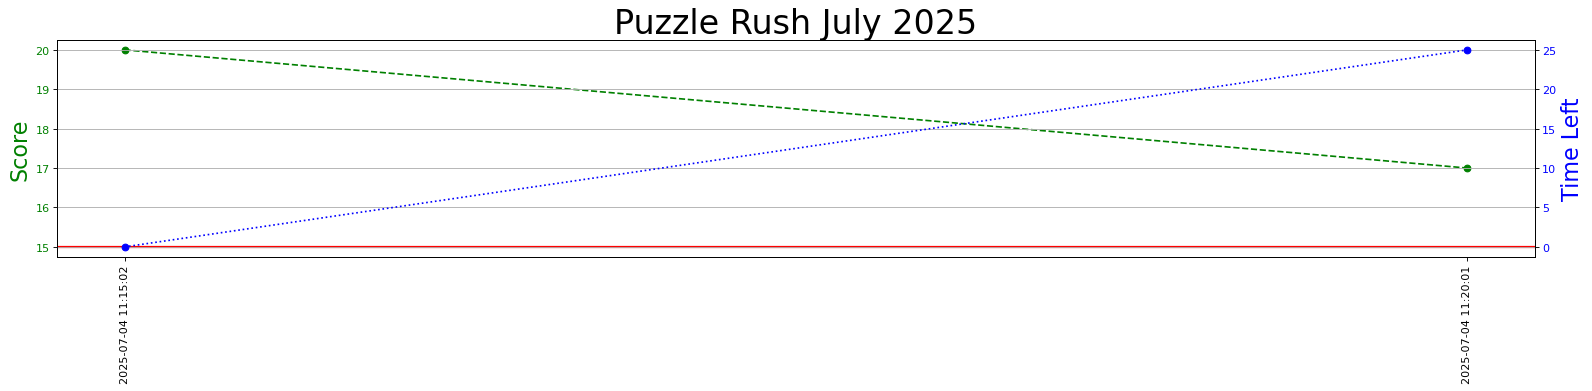

In [2]:
from datetime import datetime
import csv 

# for the current month-year 
month_year = datetime(datetime.today().year, datetime.today().month, 1)

data = input('Enter you result (solved puzzles, time left, errors): ')
data_write = datetime.today().strftime('%Y-%m-%d %H:%M:%S') + ',3,' + data

# I want to automatically create a csv when a new month
    # if csv exists, then write there
    # if not exists, creat a new one with name "puzzle_rush_{month_year.%Y%m}"

csv_file = 'data/csvs/puzzle_rush_202507.csv'

with open(csv_file, 'a', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(data_write.split(','))
    lines = csv.reader(csvfile)
    
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

date_time = []
score = []
time_left = []

with open(csv_file, 'r') as csvfile: # I can use pandas here, it might be even better, but I stick to this for now
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        date_time.append(row[0])
        score.append(int(row[2]))
        time_left.append(int(row[3]))
        
fig, ax1 = plt.subplots(figsize=(20, 5), dpi=80)

# data for the left axis 
ax1.plot(date_time, score, color='g', linestyle = 'dashed', marker = 'o')
ax1.set_ylabel("Score", fontsize=20, color = u'g')
ax1.tick_params(axis='y', labelcolor=u'g')
# draws one red line on y = 15 
plt.axhline(linewidth=2, color='r', y=15)
plt.xticks(rotation=90)

ax2 = ax1.twinx() # saying there is a second y axis 
ax2.plot(date_time, time_left, color='b', linestyle = 'dotted', marker = 'o')
ax2.set_ylabel("Time Left", fontsize=20, color = u'b')
ax2.tick_params(axis='y', labelcolor=u'b')


plt.xlabel("Date and Time", fontsize=20)
plt.title(f"Puzzle Rush {month_year.strftime("%B %Y")}", fontsize=30)
plt.grid()

fig.tight_layout()

# I want to add time and errorless attempts 
plt.savefig('data/pics/puzzle_rush_202507.png', bbox_inches='tight')
plt.show()

On the x-axis, there is the date and time of solving, on the y-axis, numbers of solved puzzles per one attempt. The red line goes through 15 puzzles, and it is the score I do not want to go under. 

to do: 
- if no error, make a star instead of the dot
- 5 puzzle rushes a day
- try to have 0 sec time at the end 
- slow down when errors 
- добавить время и безошибочные попытки
- make a global file with stat for each month

In [11]:
today = datetime.today()
month_year = datetime(today.year, today.month, 1)

print(month_year.strftime("%B %Y"))

May 2025
